In [1]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.metrics import f1_score
import random

from sklearn.preprocessing import StandardScaler

In [2]:
random.seed(42)

In [3]:
PATH=r"D:\Dokumente\General_Data\other_people\Hard_Metalls\240422-new_data\worked_data\Paper\Data_Sets\\"

In [4]:
X_train = pd.read_csv(f"{PATH}X_train_240722.csv")
y_train = pd.read_csv(f"{PATH}y_train_240722.csv")

In [5]:
y_train = y_train[X_train.mN ==3]
X_train = X_train[X_train.mN ==3]

In [6]:
X_val = pd.read_csv(f"{PATH}X_val_240722.csv")
y_val = pd.read_csv(f"{PATH}y_val_240722.csv")

In [7]:
y_val = y_val[X_val.mN == 3]
X_val = X_val[X_val.mN == 3]

In [8]:
features_trost =  ['Er(GPa)', 'H(GPa)','slope_0.2',  'norm_slope_0.2',  'curvature','curvature_linear', 'curvature_shift', 'norm_curvature','norm_curvature_linear', 'norm_curvature_shift', 'work_total','work_elastic', 'work_plastic', 'work_ratio', 'h_ratio']

In [9]:
scaler= StandardScaler()
X_train[features_trost]=scaler.fit_transform(X_train[features_trost])
X_val[features_trost]=scaler.transform(X_val[features_trost])

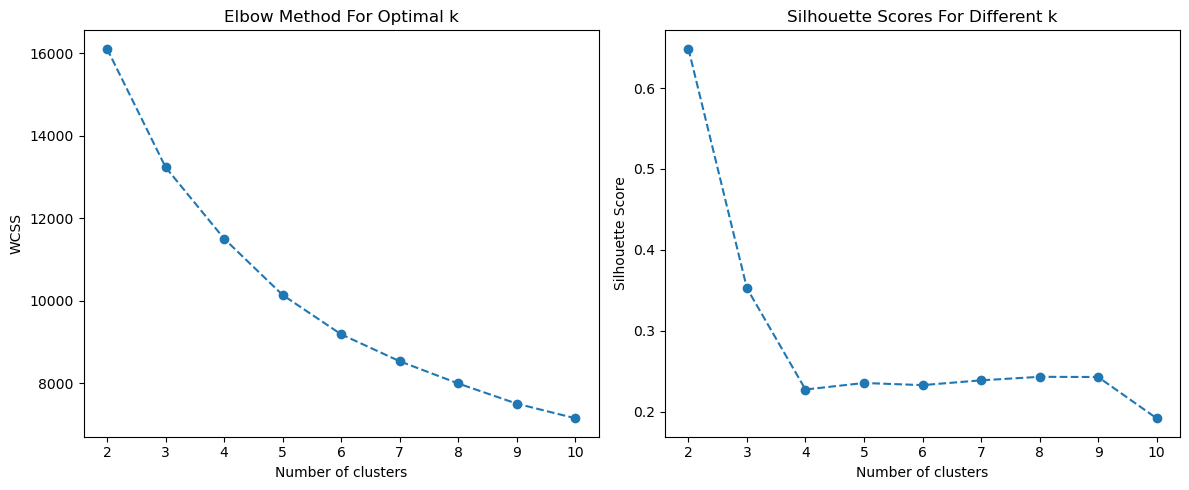

In [10]:
def calculate_wcss_silhouette(data):
    wcss = []
    silhouette_avg = []
    for n in range(2, 11):  # silhouette_score requires at least 2 clusters
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        cluster_labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(data, cluster_labels))
    return wcss, silhouette_avg

wcss, silhouette_avg = calculate_wcss_silhouette(X_train[features_trost])

# 3. Plot the elbow graph for WCSS
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# 4. Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_avg, marker='o', linestyle='--')
plt.title('Silhouette Scores For Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train[features_trost])

KMeans(n_clusters=3, n_init=10, random_state=42)

In [12]:
y_train["y_pred"] = kmeans.predict(X_train[features_trost])

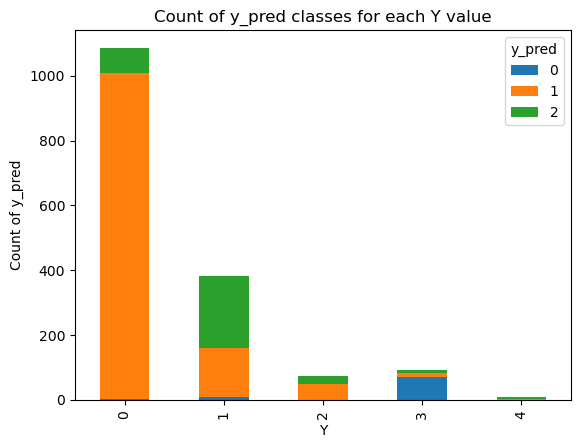

In [13]:
grouped = y_train.groupby(['Y', 'y_pred']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Y')
plt.ylabel('Count of y_pred')
plt.title('Count of y_pred classes for each Y value')
plt.legend(title='y_pred')
plt.show()

SV


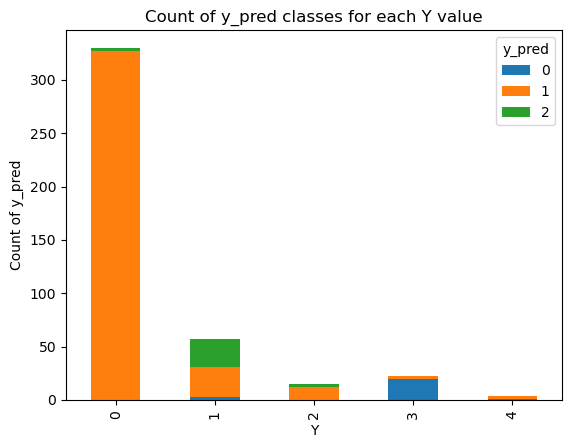

SAV


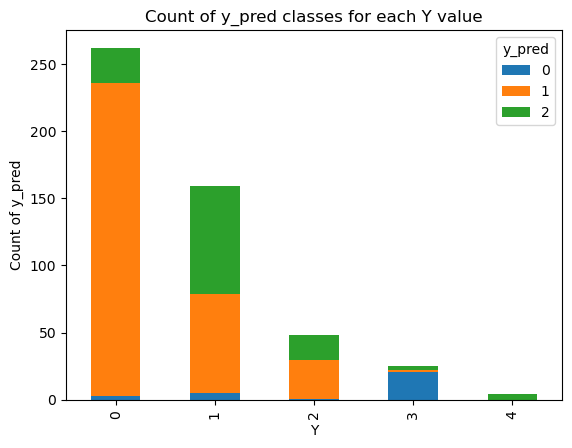

LCV


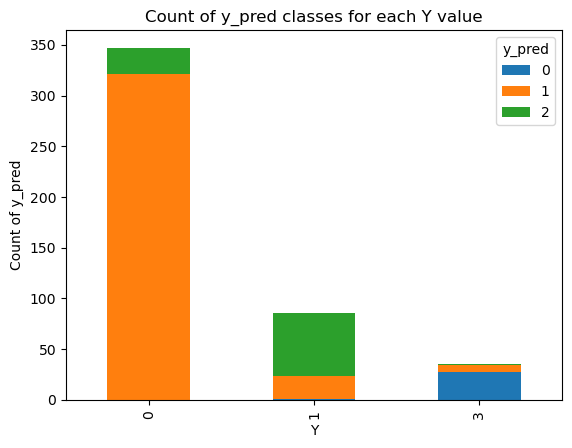

BV


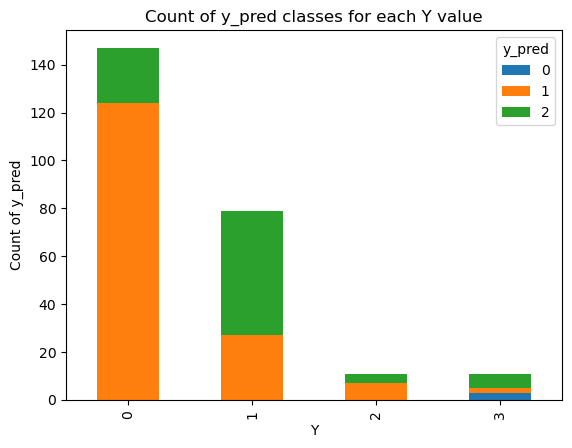

In [14]:
# Sample data

# Assuming df is the DataFrame that contains the data
# If you have the full dataset, load it into the DataFrame
# df = pd.read_csv('path_to_your_dataset.csv')

# Group by 'Y' and 'y_pred' and count the occurrences
for material in X_train.material.unique():
    print(material)
    y_train_plot=y_train[X_train.material == material]
    grouped = y_train_plot.groupby(['Y', 'y_pred']).size().unstack(fill_value=0)
    
    # Plotting
    grouped.plot(kind='bar', stacked=True)
    plt.xlabel('Y')
    plt.ylabel('Count of y_pred')
    plt.title('Count of y_pred classes for each Y value')
    plt.legend(title='y_pred')
    plt.show()

In [15]:
encoding = {1:0, 2:1, 0:3}

In [16]:
y_train["y_pred_encoded"] = y_train["y_pred"].apply(lambda x: encoding[x])
X_train["y_pred_encoded"] = y_train["y_pred_encoded"]

In [17]:
def calculate_stats(group):
    return pd.DataFrame({
        'material': group['material'].unique()[0],
        'y_pred_encoded': group['y_pred_encoded'].unique()[0],
        'Er(GPa)_mean': group['Er(GPa)'].mean(),
        'Er(GPa)_std': group['Er(GPa)'].std(),
        'H(GPa)_mean': group['H(GPa)'].mean(),
        'H(GPa)_std': group['H(GPa)'].std()
    }, index=[0])

result = X_train.groupby(['material', 'y_pred_encoded']).apply(calculate_stats)

C:\Users\ctrost\AppData\Local\Temp\ipykernel_8588\3317489321.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = X_train.groupby(['material', 'y_pred_encoded']).apply(calculate_stats)


In [18]:
result

material  y_pred_encoded  Er(GPa)_mean  Er(GPa)_std  \
material y_pred_encoded                                                         
BV       0              0       BV               0      0.171698     0.498133   
         1              0       BV               1      1.249119     1.031483   
         3              0       BV               3      1.139732     0.226232   
LCV      0              0      LCV               0     -0.123372     0.548433   
         1              0      LCV               1      1.263676     0.877859   
         3              0      LCV               3      1.304894     1.185637   
SAV      0              0      SAV               0     -0.327487     0.571973   
         1              0      SAV               1      0.888047     0.873716   
         3              0      SAV               3      1.265221     0.937031   
SV       0              0       SV               0     -0.881240     0.613822   
         1              0       SV               1      0.666196     1.015850   
         3              0       SV               3      0.825380     1.508375   

                           H(GPa)_mean  H(GPa)_std  
material y_pred_encoded                             
BV       0              0    -0.411275    0.290626  
         1              0     0.023410    0.587674  
         3              0     3.545828    0.267496  
LCV      0              0    -0.336743    0.272303  
         1              0     0.414471    0.582644  
         3              0     3.841288    1.633173  
SAV      0              0    -0.383360    0.308186  
         1              0     0.315867    0.624185  
         3              0     3.257173    1.381129  
SV       0              0    -0.205360    0.302557  
         1              0     0.362376    0.476665  
         3              0     3.409410    1.863568

In [19]:
f1_score(y_train.Y, y_train.y_pred_encoded, average="macro")

0.4564410763087657

In [20]:
f1_score(y_train.Y, y_train.y_pred_encoded, average="weighted")

0.7638691101381917

In [21]:
X_val["predictions"]=kmeans.predict(X_val[features_trost])
X_val["predictions_encoded"] = X_val["predictions"].apply(lambda x: encoding[x])

In [22]:
f1_score(y_val.Y, X_val.predictions_encoded, average="macro")

0.4694169966598404

In [23]:
f1_score(y_val.Y, X_val.predictions_encoded, average="weighted")

0.7602550918107897

In [24]:
for material in X_val.material.unique():
    print(material)
    y_val_material = y_val[X_val.material == material]
    current_X_val = X_val[X_val.material == material]
    print(f1_score(y_val_material.Y, current_X_val.predictions_encoded, average="macro"))
    print(f1_score(y_val_material.Y, current_X_val.predictions_encoded, average="weighted"))

SV
0.4934008520215417
0.8546279178463086
LCV
0.8138566755872733
0.8573617877810563
SAV
0.45073710073710077
0.6299066339066339
BV
0.35384615384615387
0.6759305210918114


<Axes: >

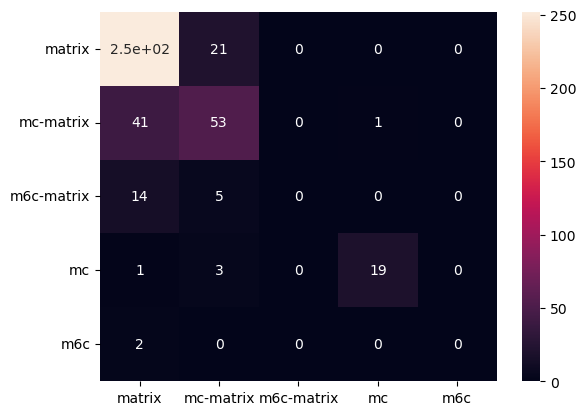

In [25]:
cm = confusion_matrix(y_val.Y, X_val.predictions_encoded)
labels= {
    'matrix': 0,
    'mc-matrix': 1,
    'm6c-matrix': 2,
    'mc': 3,
    'm6c': 4,}
sns.heatmap(cm, annot=True,xticklabels=labels, yticklabels=labels)

SV


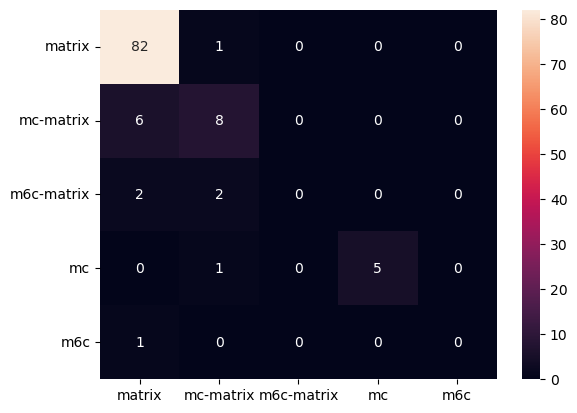

LCV


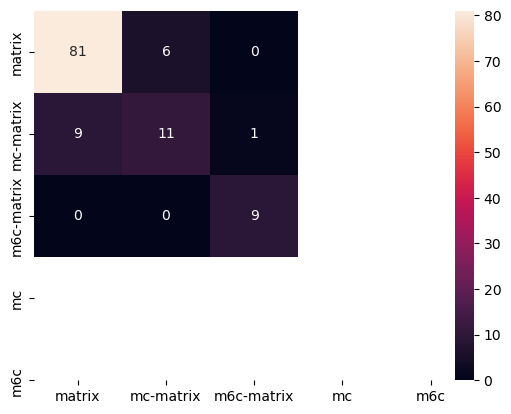

SAV


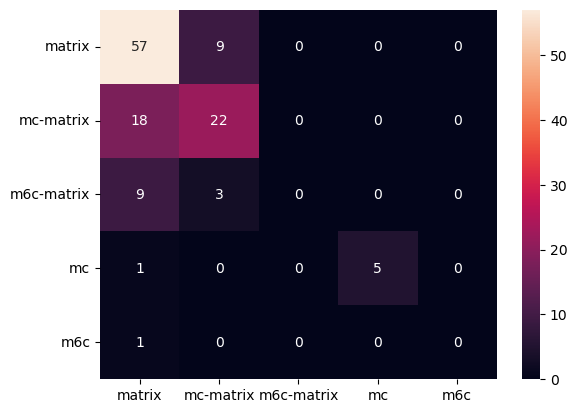

BV


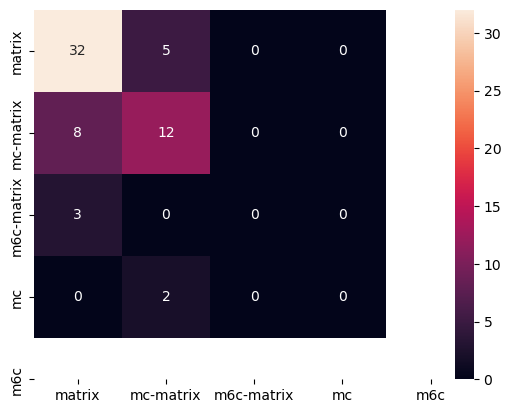

In [26]:
for material in X_val.material.unique():
    print(material)
    y_train_material = y_val[X_val.material == material]
    X_val_material = X_val[X_val.material == material]
    cm = confusion_matrix(y_train_material.Y, X_val_material.predictions_encoded)
    labels= {
        'matrix': 0,
        'mc-matrix': 1,
        'm6c-matrix': 2,
        'mc': 3,
        'm6c': 4,}
    sns.heatmap(cm, annot=True,xticklabels=labels, yticklabels=labels)
    plt.show()

In [27]:
PATH_1=r"D:\Dokumente\General_Data\other_people\Hard_Metalls\240417_HSS_Wurfel\worked_data\DataSets\\"
wurfel = pd.read_csv(f"{PATH_1}data_wurfel.csv")
wurfel=wurfel[wurfel.map_name=='HSS_BW_3mN_map01']

In [28]:
wurfel["y_pred"] = kmeans.predict(scaler.transform(wurfel[features_trost]))

C:\ProgramData\anaconda3\envs\XGB-SMOTE\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [29]:
wurfel["y_pred"] = wurfel["y_pred"].apply(lambda x: encoding[x])

In [30]:
mapping= {
    'matrix': 0,
    'mc-matrix': 1,
    'm6c-matrix': 2,
    'mc': 3,
    'm6c': 4,
    'mc-mc': 3,
    'm6c-m6c': 4,
    'mc-m6c': 5}

In [31]:
wurfel["y_encoded"] = wurfel.Y_name.apply(lambda x: mapping[x])

In [32]:
wurfel["X [µm]"]=wurfel["X(mm)"]-wurfel["X(mm)"].min()
wurfel["X [µm]"]=wurfel["X [µm]"]*1000
wurfel["X [µm]"]=wurfel["X [µm]"].round(2)
wurfel["Y [µm]"]=wurfel["Y(mm)"]-wurfel["Y(mm)"].max()
wurfel["Y [µm]"]=wurfel["Y [µm]"] *1000
wurfel["Y [µm]"]=wurfel["Y [µm]"].round(2)

C:\Users\ctrost\AppData\Local\Temp\ipykernel_8588\2418536769.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sns.heatmap(data=df_pivoted_pred, cmap=plt.cm.get_cmap('viridis'), cbar=False,
C:\Users\ctrost\AppData\Local\Temp\ipykernel_8588\2418536769.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sns.heatmap(data=df_pivoted_encoded, cmap=plt.cm.get_cmap('viridis'), cbar=False,


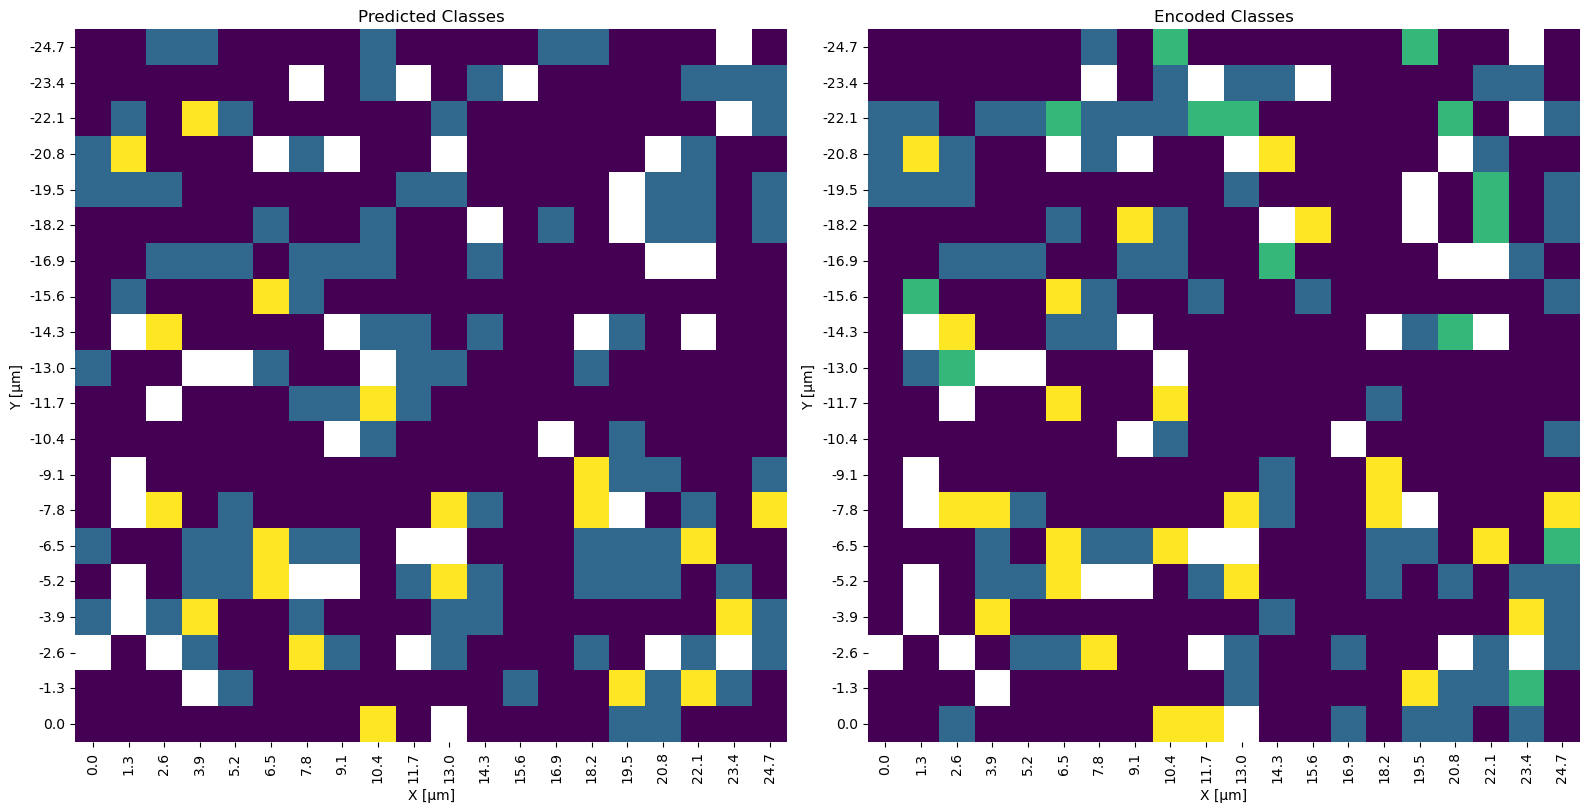

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


class_names = list(labels.keys())
class_values = list(labels.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # Create 1 row, 2 columns subplot

# Heatmap for predicted classes
df_pivoted_pred = wurfel.pivot(columns='X [µm]', index='Y [µm]', values='y_pred')
sns.heatmap(data=df_pivoted_pred, cmap=plt.cm.get_cmap('viridis'), cbar=False,
            cbar_kws={'ticks': class_values, 'label': 'Predicted Class'},
            square=True, ax=ax1, fmt='')

ax1.set_title('Predicted Classes')


# Remove x and y axis tick labels
#ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# Heatmap for encoded classes (assuming y_encoded exists)
df_pivoted_encoded = wurfel.pivot(columns='X [µm]', index='Y [µm]', values='y_encoded')
sns.heatmap(data=df_pivoted_encoded, cmap=plt.cm.get_cmap('viridis'), cbar=False,
            cbar_kws={'ticks': class_values},
            square=True, ax=ax2, fmt='')

ax2.set_title('Encoded Classes')
#ax2.collections[0].colorbar.set_ticklabels(labels)

# Remove x and y axis tick labels for encoded class heatmap
#ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.tight_layout()
plt.show()


In [34]:
f1_score(wurfel.y_encoded, wurfel.y_pred, average="weighted")

0.7467351116691887

In [35]:
f1_score(wurfel.y_encoded, wurfel.y_pred, average="macro")

0.5498201004539747

<Axes: >

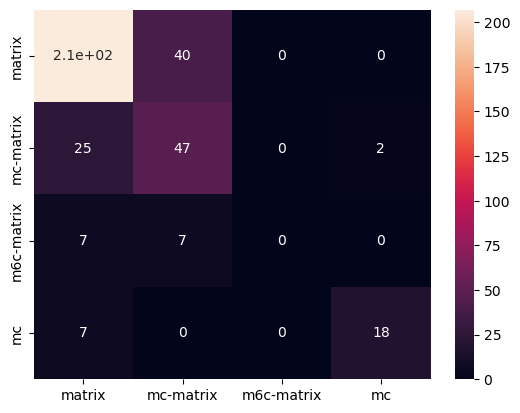

In [36]:
cm = confusion_matrix(wurfel.y_encoded, wurfel.y_pred)
labels= {
    'matrix': 0,
    'mc-matrix': 1,
    'm6c-matrix': 2,
    'mc': 3,}
sns.heatmap(cm, annot=True,xticklabels=labels, yticklabels=labels)

In [37]:
X_train_phases=X_train[(y_train.y_pred_encoded==0)]

In [38]:
y_phases = X_train_phases.material

In [39]:
y_phases.unique()

array(['SAV', 'LCV', 'BV', 'SV'], dtype=object)

In [40]:
import numpy as np

In [41]:
X=X_train[features_trost]

In [42]:
import pandas as pd
import numpy as np

# Assuming you have your data in a pandas DataFrame (df) and fitted KMeans model (kmeans)
data = X.to_numpy()  # Convert DataFrame to NumPy array for calculations
cluster_centers = kmeans.cluster_centers_
n_features = data.shape[1]

# Initialize an empty array to store feature importances
feature_importances = np.zeros(n_features)

# Access feature names from the DataFrame's columns
feature_names = X.columns

# Iterate through each feature (using enumerate to access both index and name)
for feature_idx, feature_name in enumerate(feature_names):
  # Calculate variance within each cluster for the current feature
  feature_variance = np.var(data[:, feature_idx], axis=0)
  # Average the variance across clusters
  feature_importances[feature_idx] = np.mean(feature_variance)

# Create a pandas DataFrame to store feature names and importances
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order (highest importance first)
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Print the DataFrame showing feature names and their importance scores
print(importance_df)


                  feature  importance
1                  H(GPa)         1.0
2               slope_0.2         1.0
9    norm_curvature_shift         1.0
10             work_total         1.0
13             work_ratio         1.0
0                 Er(GPa)         1.0
3          norm_slope_0.2         1.0
4               curvature         1.0
5        curvature_linear         1.0
6         curvature_shift         1.0
8   norm_curvature_linear         1.0
12           work_plastic         1.0
7          norm_curvature         1.0
11           work_elastic         1.0
14                h_ratio         1.0


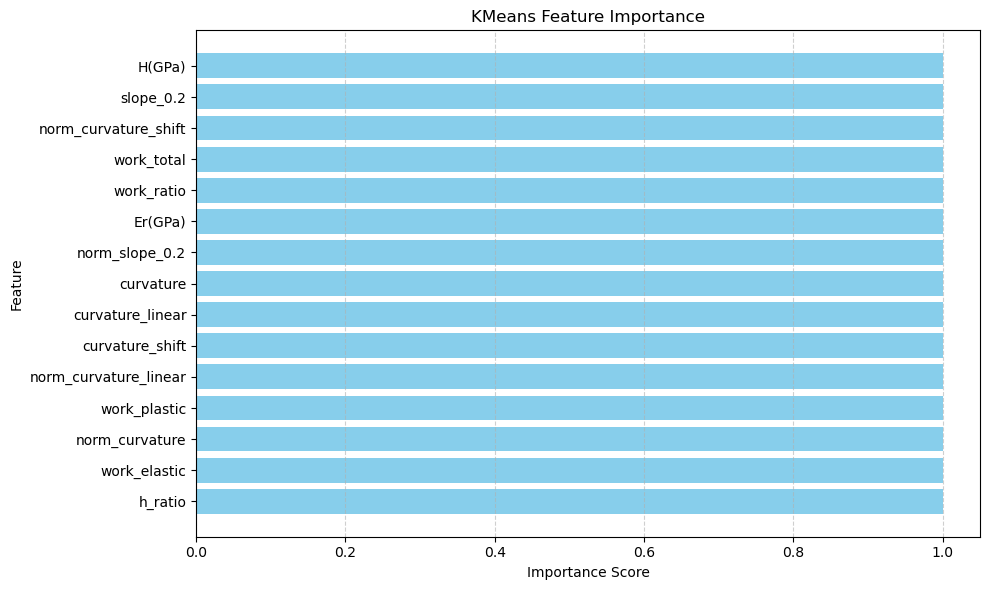

In [43]:
import matplotlib.pyplot as plt

# Assuming you have the importance DataFrame (importance_df) from the previous code

# Extract feature names and importances for plotting
features = importance_df['feature'].to_numpy()
importances = importance_df['importance'].to_numpy()

# Configure the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(features, importances, color='skyblue')  # Horizontal bar chart
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('KMeans Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top

# Optional: Customize the plot further with grid lines, labels, etc. (refer to Matplotlib documentation)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [44]:
labels={0: "Matrix", 1: "Interface", 3:"MC"}

In [45]:
X_train.y_pred_encoded.value_counts()

y_pred_encoded
0    1220
1     337
3      85
Name: count, dtype: int64

In [46]:
X_train.y_pred_encoded.unique()

array([3, 0, 1], dtype=int64)

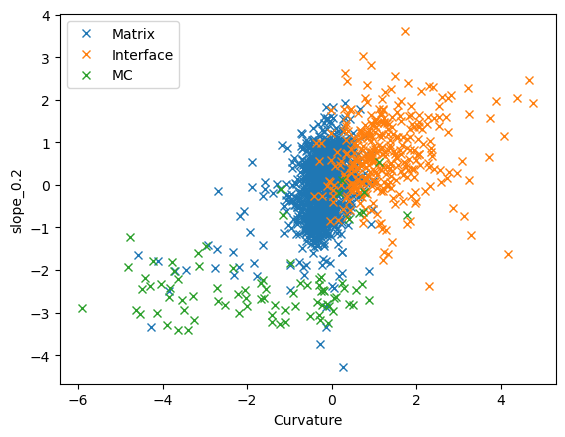

In [47]:
for y_pred in [0,1,3]:
    to_plot = X_train[X_train.y_pred_encoded == y_pred]
    plt.plot(to_plot["curvature"], to_plot["slope_0.2"], 'x', label=labels[y_pred])
    plt.xlabel("Curvature")
    plt.ylabel("slope_0.2")
    plt.legend()

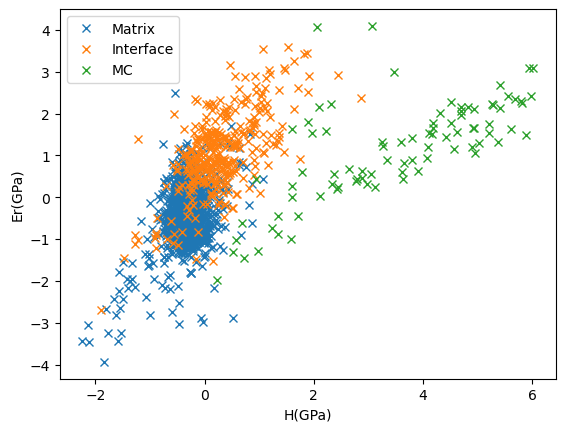

In [48]:
for y_pred in [0,1,3]:
    to_plot = X_train[X_train.y_pred_encoded == y_pred]
    plt.plot(to_plot["H(GPa)"],to_plot["Er(GPa)"], 'x', label=labels[y_pred])
    plt.ylabel("Er(GPa)")
    plt.xlabel("H(GPa)")
    plt.legend()